#### 2. Cleaning & Feature Engineering

Raw data generally has missing / NAN values, inconsistent formats, features you don't want and simply noisy columns. The goal is to condense this into a subset of features where each feature has predictive power.

We will go through various methods to modify our data. Not one modification is universally the best. It depends entirely on your data. Remember that you should try ALL possible modifications and choose one that results in better metrics in validation.

Start by opening your Python IDE. Google Colab is recommended, though you can create a virtual enviornment in your IDE (VSCODE / Jupyter Notebook Locally) and run your code locally.

Upload your dataset and put it into a pandas dataframe.

Google Colab Upload:

In [ ]:
from google.colab import files
import pandas as pd

originalData = files.upload()
file = list(originalData.keys())[0]
df = pd.read_csv(file)

Local Upload:

In [ ]:
import pandas as pd

df = pd.read.csv('data.csv')

Use df.head(10) to view the top 10 rows in your dataset.

df.head() displays the entire dataset, which might take forever to run depending on your display settings.

In colab, df.head() displays the top 5 and bottom 5 rows of your dataset. Use **pd.set_option('display.max_rows', None)**
to display all rows.

What do you notice about the dataset below? Brace your eyes.

In [ ]:
df.head(10)

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202405,23,1947,202405,23,1947,190907,1180619,OKLAHOMA,40,2024,May,Hail,C,65,JACKSON,OUN,5/23/2024 19:47,CST-6,5/23/2024 19:47,0,0,0,0,NaN,NaN,Public,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,S,FRIENDSHIP,4.0,S,FRIENDSHIP,34.6380,-99.2167,34.6380,-99.2167,Two primary rounds of severe convection occurr...,MPing report.,CSV
1,202411,16,230,202411,18,1421,197838,1223377,OREGON,41,2024,November,Heavy Snow,Z,509,EAST SLOPES OF THE OREGON CASCADES,PDT,11/16/2024 2:30,PST-8,11/18/2024 14:21,0,0,0,0,0.00K,0.00K,SNOTEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A series of cold fronts the weekend of Nov. 16...,The Hog Pass SNOTEL reported an estimated 12 i...,CSV
2,202405,19,1839,202405,19,1902,190905,1184919,OKLAHOMA,40,2024,May,Tornado,C,39,CUSTER,OUN,5/19/2024 18:39,CST-6,5/19/2024 19:02,0,0,0,0,150.00K,0.00K,NWS Storm Survey,NaN,NaN,NaN,NaN,EF1,6.7,400.0,NaN,NaN,NaN,NaN,8.0,WNW,CUSTER CITY,5.0,N,CUSTER CITY,35.7100,-99.0010,35.7370,-98.8910,Significant severe weather occurred across por...,While the large multiple-vortex tornado was ap...,CSV
3,202405,23,2155,202405,23,2155,190907,1180805,OKLAHOMA,40,2024,May,Thunderstorm Wind,C,51,GRADY,OUN,5/23/2024 21:55,CST-6,5/23/2024 21:55,0,0,0,0,10.00K,NaN,Other Federal Agency,61.00,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,W,NINNEKAH,2.0,W,NINNEKAH,34.9501,-97.9523,34.9501,-97.9523,Two primary rounds of severe convection occurr...,Relayed image showing a portable outbuilding b...,CSV
4,202405,24,1405,202405,24,1410,191916,1182348,MISSISSIPPI,28,2024,May,Thunderstorm Wind,C,115,PONTOTOC,MEG,5/24/2024 14:05,CST-6,5/24/2024 14:10,0,0,0,0,1.00K,0.00K,Public,52.00,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N,ALGOMA,0.0,N,ALGOMA,34.1800,-89.0300,34.1800,-89.0300,An active storm pattern as several mid-level s...,Reports of trees down in Algoma.,CSV
5,202411,1,0,202411,1,1600,197531,1221908,WASHINGTON,53,2024,November,Heavy Snow,Z,211,SOUTH WASHINGTON CASCADES,PQR,11/1/2024 0:00,PST-8,11/1/2024 16:00,0,0,0,0,0.00K,0.00K,SNOTEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A frontal boundary followed by a large area of...,The Swift Creek SNOTEL at 4400 ft recorded 14 ...,CSV
6,202411,1,0,202411,1,1600,197530,1221909,OREGON,41,2024,November,Heavy Snow,Z,127,CASCADES OF MARION AND LINN COUNTIES,PQR,11/1/2024 0:00,PST-8,11/1/2024 16:00,0,0,0,0,0.00K,0.00K,SNOTEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A frontal boundary followed by a large area of...,Bear Grass SNOTEL at 4720 ft recorded 13 inche...,CSV
7,202405,14,1510,202405,14,1515,191820,1181506,MISSISSIPPI,28,2024,May,Hail,C,141,TISHOMINGO,MEG,5/14/2024 15:10,CST-6,5/14/2024 15:15,0,0,0,0,0.00K,0.00K,Broadcast Media,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NW,TISHOMINGO CO ARPT,1.0,NW,TISHOMINGO CO ARPT,34.5100,-88.2100,34.5100,-88.2100,A large upper level low from central Missouri ...,NaN,CSV
8,202405,14,1352,202405,14,1357,191821,1181499,TENNESSEE,47,2024,May,Hail,C,71,HARDIN,MEG,5/14/2024 13:52,CST-6,5/14/2024 13:57,0,0,0,0,0.00K,0.00K,Law Enforcement,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,SSE,EUREKA,1.0,SSE,EUREKA,35.2000,-88.2400,35.2000,-88.2400,A large upper level low from central Missouri ...,Sub-severe hail reported near Savannah.,CSV
9,202411,17,1100,202411,18,2100,197535,1221931,OREGON,41,20

1. Too many columns.
    > Columns like Episode ID, State Fips, CZ Timezone and WFO may not add value unless you're doing geographic modeling or event identification. If a column doesn't seem to contribute to a prediction / have any sort of numeric pattern with the target variable, drop it.
2. Missing / NAN values
    > Magnitude, every TOR column and damaged property have NAN values. We will replace nan values with better values, but for damaged property, we will simply remove rows where damage property is nan. This is because we need real target outputs to predict and we can't falsify true outputs.
3. Incorrect Format
    > Damaged Property is stored as a string representation of the float number it should be. 150.00K should be changed to 150,000. 10.00K should be 10,000.

These are the most pressing issues right now. Lets address the irrelevant columns, figure out how to remove NAN / missing values, and correct types and formats.

#### Remove Irrelevant Columns

Use df.drop(columns=...) to drop columns. I like to store them in an list first:

In [ ]:
columns_to_drop = ['BEGIN_DATE_TIME', 'END_DATE_TIME', 'SOURCE', 'MAGNITUDE_TYPE',
                   'CATEGORY', 'BEGIN_LOCATION', 'END_LOCATION', 'BEGIN_LAT',  'END_LAT',
                   'DATA_SOURCE', 'WFO', 'EVENT_ID', 'EPISODE_ID', 'STATE_FIPS', 'YEAR',
                   'CZ_TIMEZONE', 'DAMAGE_CROPS', 'END_AZIMUTH', 'BEGIN_AZIMUTH']
df.drop(columns=columns_to_drop, inplace=True)

After dropping my irrelevant columns:

In [ ]:
df.head(10)

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,STATE,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,MAGNITUDE,FLOOD_CAUSE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,END_RANGE,BEGIN_LON,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE
0,202405,23,1947,202405,23,1947,OKLAHOMA,May,Hail,C,65,JACKSON,0,0,0,0,NaN,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,-99.2167,-99.2167,Two primary rounds of severe convection occurr...,MPing report.
1,202411,16,230,202411,18,1421,OREGON,November,Heavy Snow,Z,509,EAST SLOPES OF THE OREGON CASCADES,0,0,0,0,0.00K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A series of cold fronts the weekend of Nov. 16...,The Hog Pass SNOTEL reported an estimated 12 i...
2,202405,19,1839,202405,19,1902,OKLAHOMA,May,Tornado,C,39,CUSTER,0,0,0,0,150.00K,NaN,NaN,EF1,6.7,400.0,NaN,NaN,NaN,NaN,8.0,5.0,-99.0010,-98.8910,Significant severe weather occurred across por...,While the large multiple-vortex tornado was ap...
3,202405,23,2155,202405,23,2155,OKLAHOMA,May,Thunderstorm Wind,C,51,GRADY,0,0,0,0,10.00K,61.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,-97.9523,-97.9523,Two primary rounds of severe convection occurr...,Relayed image showing a portable outbuilding b...
4,202405,24,1405,202405,24,1410,MISSISSIPPI,May,Thunderstorm Wind,C,115,PONTOTOC,0,0,0,0,1.00K,52.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-89.0300,-89.0300,An active storm pattern as several mid-level s...,Reports of trees down in Algoma.
5,202411,1,0,202411,1,1600,WASHINGTON,November,Heavy Snow,Z,211,SOUTH WASHINGTON CASCADES,0,0,0,0,0.00K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A frontal boundary followed by a large area of...,The Swift Creek SNOTEL at 4400 ft recorded 14 ...
6,202411,1,0,202411,1,1600,OREGON,November,Heavy Snow,Z,127,CASCADES OF MARION AND LINN COUNTIES,0,0,0,0,0.00K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A frontal boundary followed by a large area of...,Bear Grass SNOTEL at 4720 ft recorded 13 inche...
7,202405,14,1510,202405,14,1515,MISSISSIPPI,May,Hail,C,141,TISHOMINGO,0,0,0,0,0.00K,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,-88.2100,-88.2100,A large upper level low from central Missouri ...,NaN
8,202405,14,1352,202405,14,1357,TENNESSEE,May,Hail,C,71,HARDIN,0,0,0,0,0.00K,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,-88.2400,-88.2400,A large upper level low from central Missouri ...,Sub-severe hail reported near Savannah.
9,202411,17,1100,202411,18,2100,OREGON,November,Heavy Snow,Z,127,CASCADES OF MARION AND LINN COUNTIES,0,0,0,0,0.00K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A cold frontal boundary arriving on Nov 17th f...,Bear Grass SNOTEL at 4720 ft recorded 20 inche...


This is much better. The irrelevant features are gone, and I've kept features I know will have *some* predictive power over damaged property.

This is a valid thought process:

> State definitely matters, considering certain states might have more destructive events. Event Type will definitely impact the amount of damage done. Event_Narrative, while not numeric, can be converted to numbers based off how strongly the event is described in words. I have faith in all these features, though I haven't necessarily tested them yet. After validation, we will come back and determine which features are *known* to have predictive power. This is a good starting point.

### Incorrect Format

Damaged property has nan values. We can check the balance of rows with the following code, and then drop all rows where damaged property is nan.

In [ ]:
print('Nan values:', df['DAMAGE_PROPERTY'].isna().sum())
print('Non-nan values:', df['DAMAGE_PROPERTY'].notna().sum())

Nan values: 15334
Non-nan values: 54862


In [ ]:
df.dropna(subset=['DAMAGE_PROPERTY'], inplace=True)

In [ ]:
print('Nan values:', df['DAMAGE_PROPERTY'].isna().sum())
print('Non-nan values:', df['DAMAGE_PROPERTY'].notna().sum())

Nan values: 0
Non-nan values: 54862


Not only do essentially all models require numerical columns, but damaged property in particular needs to contain floats (not strings) so we can perform operations on it. The following code is based on how damaged property is formatted in this data (K, M, B Notation). We use value.endswith() to check whether the last character is a K, M or B. After finding which statement is true, we index the string value from the beginning character to the second to last character, we typecast the index to a float, and then we multiply the float by the proper constant.

In [ ]:
def parse_damage(value):
    if isinstance(value, str):
        value = value.upper().strip()
        if value.endswith('K'):
            return float(value[:-1]) * 1_000
        elif value.endswith('M'):
            return float(value[:-1]) * 1_000_000
        elif value.endswith('B'):
            return float(value[:-1]) * 1_000_000_000
        else:
            return float(value)
    else:
        return value

df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].apply(parse_damage)

In [ ]:
print(df['DAMAGE_PROPERTY'].head())

1          0.0
2     150000.0
3      10000.0
4       1000.0
5          0.0
6          0.0
7          0.0
8          0.0
9          0.0
10         0.0
Name: DAMAGE_PROPERTY, dtype: float64


### Impute Missing Values

Magnitude has many nan values, which we can potentially replace with the median, mean, or mode of magnitude. We can also use a speicific value based on what gives the best metrics. Furthermore, we could drop all data points where magnitude is nan. This is an example of multiple potential modifications where you should try them all, and commit to one change after the validation set.

For now, this is a helpful rule:

> If you have enough data where the feature is not nan, you can drop the nan feature rows. If you're scarce on data, you can find a value to impute.

Lets explore both options.

#### Finding a mean, median or mode value to impute with.

We can inspect magnitude to determine the best decision to make. Lets make a histogram to see the frequency distribution of magnitude.

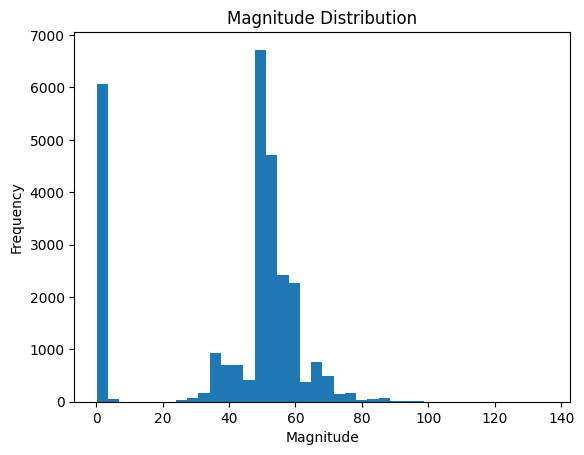

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['MAGNITUDE'].dropna(), bins=40)
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Magnitude Distribution')
plt.show()

# print median, mean and mode

> 6000 data points have a magnitude value of roughly zero, and 8300 data points have a magnitude value of 50.

> Furthermore, we can note the distribution of our magnitude frequencies and the behavior of the core cluster.

The goal is to find a imputation value that keeps the distribution the same before and after imputation. We can make three dataframe copies, impute the nan with median, mean and mode for all three, and replot the dataframe copies to see which is most similar to our original dataframe. What we want to see is an identical core cluster around the middle peak, meaning the shape of our core is identical to the shape of our original plot's core.

Mean: 41.26478886057517


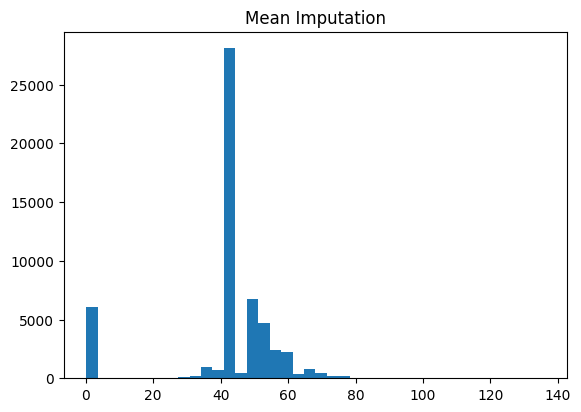

In [ ]:
mean = df['MAGNITUDE'].mean()
print('Mean:', mean)

mean_imputed = df['MAGNITUDE'].copy()
mean_imputed.fillna(mean, inplace=True)

plt.figure(figsize=(6.5, 4.5))
plt.hist(mean_imputed, bins=40)
plt.title('Mean Imputation')
plt.show()

Median: 50.0


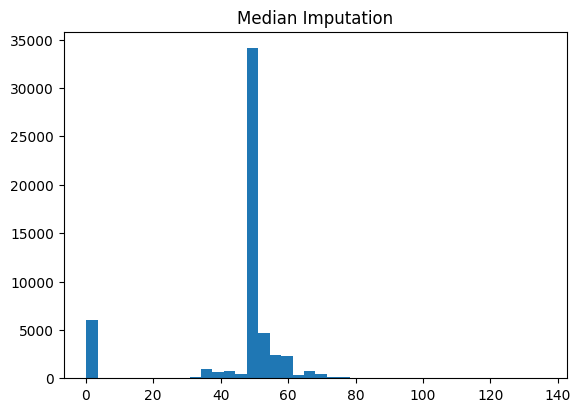

In [ ]:
median = df['MAGNITUDE'].median()
print('Median:', median)

median_imputed = df['MAGNITUDE'].copy()
median_imputed.fillna(median, inplace=True)

plt.figure(figsize=(6.5, 4.5))
plt.hist(median_imputed, bins=40)
plt.title('Median Imputation')
plt.show()

Mode: 50.0


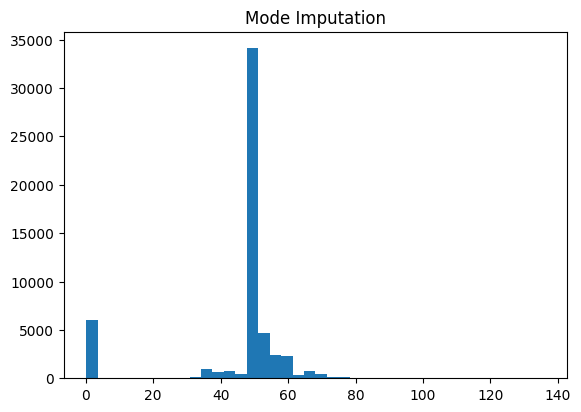

In [ ]:
mode = df['MAGNITUDE'].mode()[0]
print('Mode:', mode)

mode_imputed = df['MAGNITUDE'].copy()
mode_imputed.fillna(mode, inplace=True)

plt.figure(figsize=(6.5, 4.5))
plt.hist(mode_imputed, bins=40)
plt.title('Mode Imputation')
plt.show()

Imputing with the median or mode is ideal here. Sure, there are far more values in the middle peak, resulting in inbalanced peaks between zero and the middle peak, but the core cluster is almost the same as the original plot. The mean plot contains a middle peak around 40, resulting in empty space to the right of the peak, which causes a differently shaped core cluster.

As we stated, we could also drop nan magnitude rows entirely. Though we must first check how many rows are nan and how many aren't, to determine if we're low on non-nan magnitude rows.

#### Removing NAN-valued rows entirely

This code checks the amount of rows where magnitude is nan and not nan.

In [ ]:
nan_count = df['MAGNITUDE'].isna().sum()
non_nan_count = df['MAGNITUDE'].notna().sum()

print("Nan magnitude values:", nan_count)
print("Non-nan magnitude values:", non_nan_count)

Nan magnitude values: 27392
Non-nan magnitude values: 27470


Almost half of our data would be lost if we removed nan-magnitude rows entirely. This is risky, but also could be beneficial and would be an example of reducing our learnable space. If we removed the rows, the model's magnitude signal would be truly representative of the real magnitude values, which would resort in more accurate magnitude signal, less injected noise from imputation, and *potentially* higher metrics. Or it might not, especially if magnitude ends up being an unimportant feature.

Imagine, the rows you want to drop also contain features like event_type, tor_width and event_narrative, and these features contain values that represent healthy signal to the model. In this case, and assuming that magnitude is an important feautre, imputation would inject numbers that are theoretically noise, but represent noise that is insignificant to the healthy signal from other columns that exist in the rows that you would be dropping. Thus, the nan issue is solved, and we preserve healthy signal from other columns.

Either the signal of magnitude is better, or the signal of other columns (that exist within the rows-to-be-dropped) are better.

If magnitude is a key predictor, you can drop rows where magnitude is nan, given that magnitude has important signal. If it would be benefical to keep the 20,000 rows in order to keep the other features dense, given that the other features have more important signal, then do that.

Deciding to impute with a number or drop nan rows entirely should be made based on which provides better metrics in validation.

### Feature Engineering

Now, we can move onto Section 3: Training, Testing and Modeling

<img src="assets/confusedDataScientist.png" width="400">